# Data Visualization

### creating visualization for Gun Violence Data (2014-2021)

#### This Script contains following:
1. Importing libraries
2. create correlation matrix heatmap
3. create scatterplot
4. create pairplot
5. create categorical plot
6. answer previously written questions regarding the data
7. define hypothesis


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#define path
path=r'/Users/yeji/Documents/Career Foundry/Achievement 6'

In [3]:
#import cleaned data
df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'data_cleaned.csv'), index_col = 0)

In [4]:
#check head
df.head()

,incident_id,incident_date,month,day,year,state,city_or_county,address,killed,injured
0,2201535,December 31 2021,December,31,2021,Maryland,Capitol Heights,Cindy Ln,0,4
1,2201716,December 31 2021,December,31,2021,Mississippi,Gulfport,1200 block of Lewis Ave,3,4
2,2201216,December 31 2021,December,31,2021,California,Los Angeles,10211 S. Avalon Blvd,0,6
3,2200968,December 30 2021,December,30,2021,Pennsylvania,Philadelphia,5100 block of Germantown Ave,0,6
4,2201052,December 30 2021,December,30,2021,Missouri,Kirksville,700 block of E Dodson St,2,2


## Correlation matrix heatmap

In [5]:
#create correlation matrix
df.corr()

,incident_id,day,year,killed,injured
incident_id,1.000000,0.011333,0.991899,-0.033160,0.000612
day,0.011333,1.000000,0.001404,-0.016372,-0.026533
year,0.991899,0.001404,1.000000,-0.029953,-0.000515
killed,-0.033160,-0.016372,-0.029953,1.000000,0.462706
injured,0.000612,-0.026533,-0.000515,0.462706,1.000000


In [6]:
#create correlation matrix using seaborn - making subset with only numerical values
sub = df[['year','killed','injured']]

In [7]:
#check subset
sub

,year,killed,injured
0,2021,0,4
1,2021,3,4
2,2021,0,6
3,2021,0,6
4,2021,2,2
...,...,...,...
3386,2014,0,5
3387,2014,0,4
3388,2014,1,3
3389,2014,1,3


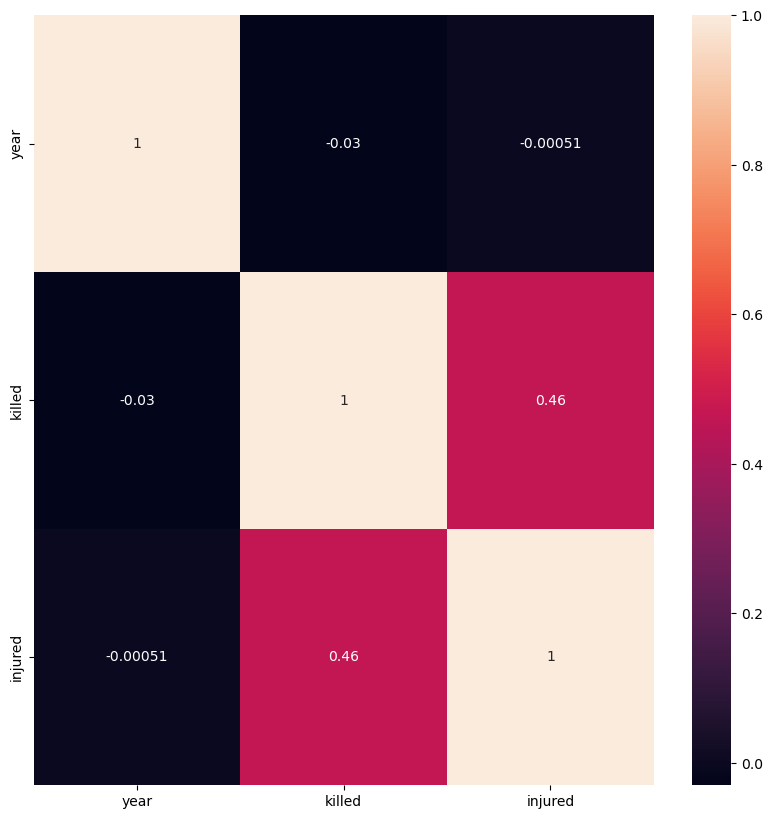

In [8]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap using seaborn 
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

In [9]:
#save figure
corr.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'heatmap.png'))

### coefficent relationship 
with year and injured: -0.00051 coefficient indicates no correlation. This can be intepreted as number of injured did not increase nor decrease within the recent years. 
with year and killed:  -.03 coefficient indicates no correlation as well. This can be intepreted as number of individuals killed was not impacted by time. 
with killed and injured - 0.46 coeffient indicates medium correlation. This makes sense because in gun violence incidents, individuals are either killed or injured. 

## Scatterplot

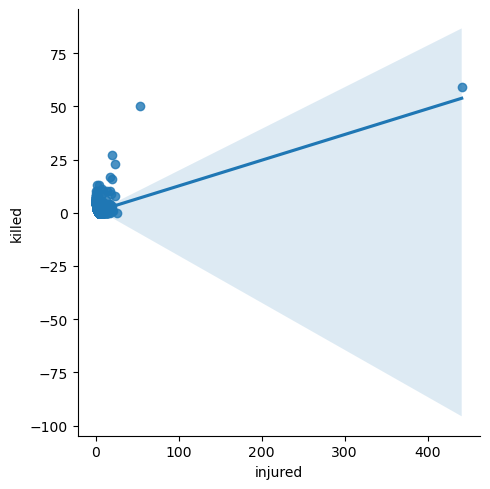

In [10]:
#create scatterplot between 'injured' and 'killed'
sns.lmplot(x = 'injured', y = 'killed', data = df)

In [11]:
#remove outlier
df_new = df[df['injured']<50]

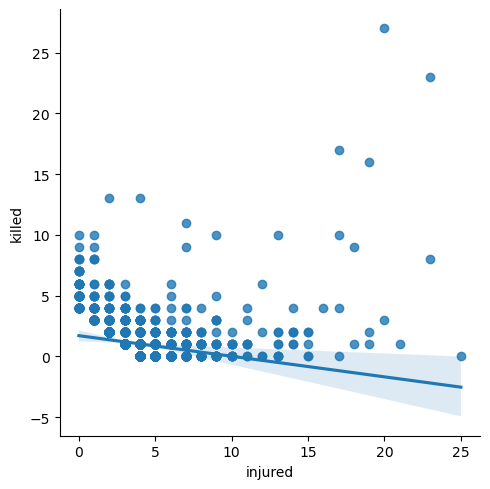

In [12]:
#new scatterplot without outlier
scatter=sns.lmplot(x = 'injured', y = 'killed', data = df_new)

### scatterplot relationship
the scatterplot shows that number of people injured and number of indivduals killed are highly concentrated in lower number. The outlier in the first graph caused the relationship to have a positive correlation but once the outliers were removed, the relationship shows slight decline in correlation. However, the outlier should still be counted in this case because there could have been a mass shooting one of the years that caused such high number of injured individuals. 

In [13]:
#save figure
scatter.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatterplot_killed_injured.png'))

## Pairplot

In [14]:
#create subset for pairplot
sub_2= df[['year','injured','killed',]]

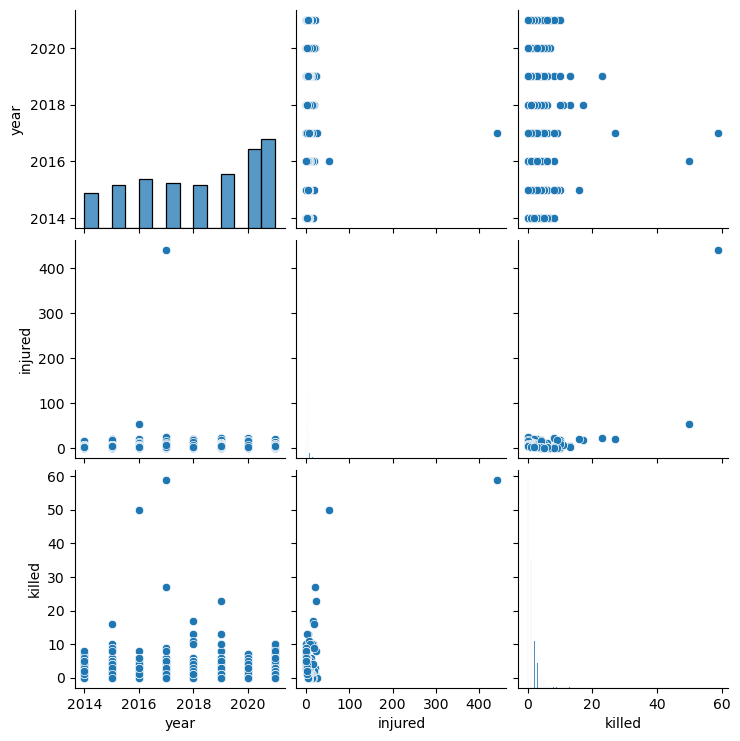

In [15]:
#create pairplot with subset
g = sns.pairplot(sub_2)

### Pairplot relationship
The pairplot shows that there was a higher number of individuals injured and killed between years 2016 and 2018. Also, it shows that there was a signficant event that occured between these years that resulted in an outlier for both the injured and killed. The graph on upper left shows histogram of the year and it shows that the frequency of incidents reported increases throughout the years. Each year should be more carefully examined to understand these occurences.

In [16]:
#save figure
g.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pairplot.png'))

## Categorical plot

<AxesSubplot:xlabel='year', ylabel='Count'>

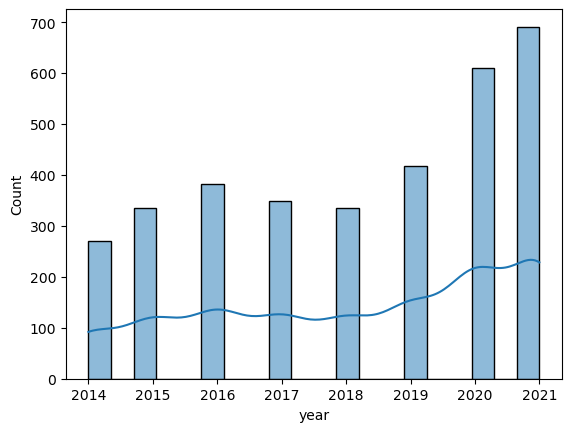

In [17]:
#create histogram to see distribution of years
sns.histplot(df['year'], bins = 20, kde = True)

In [18]:
#create subcategories with regions 
result = []

for value in df['state']:
  if value == 'Maine' or value =='New Hampshire' or value == 'Vermont'or value =='Massachusetts' or value == 'Rhode Island' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey' or value == 'Connecticut':
    result.append('Northeast')
  elif value == 'Wisconsin' or value == 'Michigan' or value =='Illinois' or value =='Indiana' or value =='Ohio'or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value =='Minnesota' or value == 'Iowa' or value == 'Missouri':
    result.append('Midwest')
  elif value =='Delaware' or value =='Maryland' or value == 'District of Columbia' or value =='Virginia' or value=='West Virginia' or value=='North Carolina' or value=='South Carolina' or value=='Georgia' or value =='Florida' or value =='Kentucky' or value =='Tennessee' or value=='Mississippi' or value =='Alabama' or value=='Oklahoma' or value=='Texas' or value=='Arkansas' or value=='Louisiana':
    result.append('South')
  else:
        result.append('West')

In [19]:
df['Regions']= result

In [20]:
df['Regions'].value_counts()

South        1503
Midwest       906
West          515
Northeast     465
Name: Regions, dtype: int64

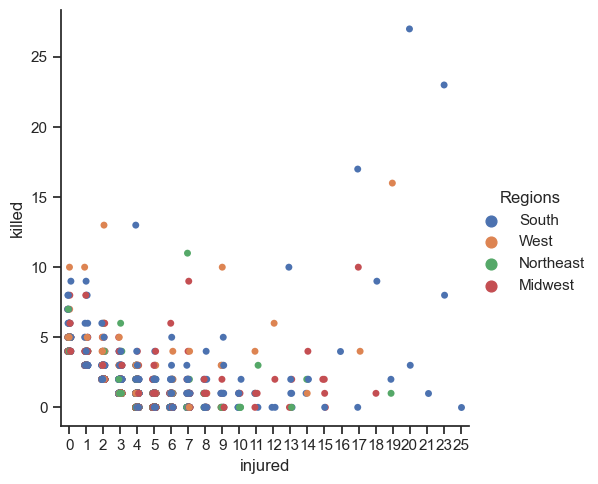

In [21]:
# Create a categorical plot with regions sub categories
sns.set(style="ticks")
region= sns.catplot(x="injured", y="killed", hue="Regions", data=df[df['injured']<50])

#### Analysis
I graphed the scatterplot of injured and killed with regions category to see if there was a specific geographic region with more incidents but did not find any pattern

In [22]:
#save figure
region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatterplot_region_category.png'))

In [23]:
#create subcategories with years
df.loc[df['year'] < 2016, 'year category'] = 'mid 2010s'

In [24]:
#create subcategories with years
df.loc[(df['year'] >= 2016) & (df['year'] < 2020), 'year category'] = 'late 2010s'

In [25]:
#create subcategories with years
df.loc[df['year'] >= 2020, 'year category'] = 'early 2020s'

In [26]:
#check count of year category
df['year category'].value_counts(dropna = False)

late 2010s     1483
early 2020s    1301
mid 2010s       605
Name: year category, dtype: int64

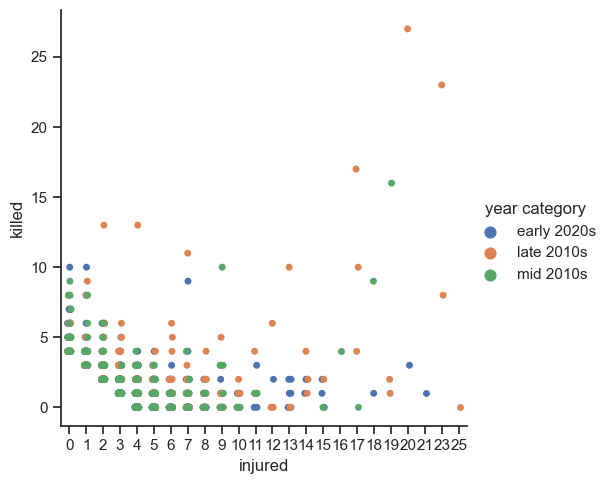

In [29]:
# Create a categorical plot with years sub categories
sns.set(style="ticks")
years= sns.catplot(x="injured", y="killed", hue="year category", data=df[df['injured']<50])

#### Analysis
Subcategory of years were created because the histogram of years showed that number of incidents were increasing. The scatterplot showed that the number of individuals killed and injured were at a lower range in the mid 2010s, which includes the year 2014 and 2015. 

In [30]:
#save figurer
years.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatterplot_years_category.png'))

### Questions to be answered
1. Is there a specific region with higher number of gun violence incidents? 
    - no specific region showed higher number of incidents. 
2. Is there an increase in number of incidents throughout the year? 
    - yes, 2020 and 2021 had higher number of incidents
3. Is there any correlation between time of the year and number of incidents?
    - cannot be determined yet 
4.  Is there any trend in number of incidents and region throughout the year?
     - cannot be determined yet 
5.  Which state has the highest number of cases?
     - cannot be determined yet 
6.  Are more populated cities, such as Los Angeles, New York, Chicago, have higher number of incidents?
      - cannot be determined yet
      some of the questions cannot be answered yet but geographical plotting might show answers to these questions
 

## Hypothesis that can be tested
1. There is an increase in number of gun violence incidents in more recent years

In [31]:
#export data
df.to_csv(os.path.join(path, 'Data','Prepared Data', 'data_with_regions.csv'))